In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [3]:
data = pd.DataFrame(load_iris().data, columns = load_iris().feature_names)
data_class = load_iris().target
data.pop('petal length (cm)')
data.pop('petal width (cm)')

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [5]:
lda = LinearDiscriminantAnalysis()
x_train, x_test, y_train, y_test = train_test_split(data, data_class, test_size = 0.23)
lda.fit(x_train, y_train)
lda.predict(x_test)
result = pd.DataFrame([y_test, lda.predict(x_test)]).T

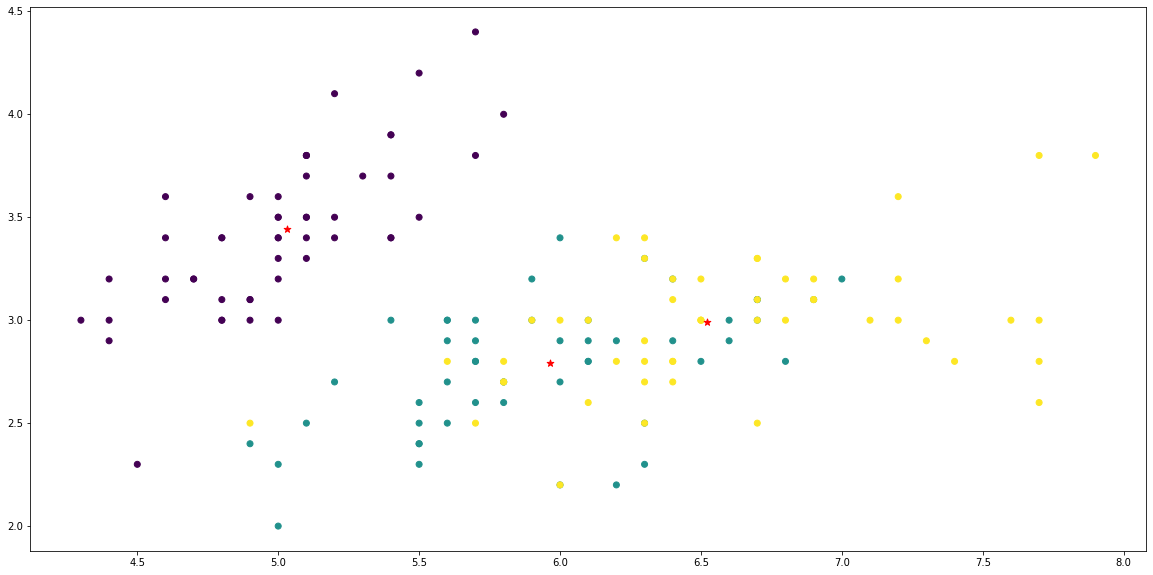

In [6]:
plt.figure(figsize=(20, 10))
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c = data_class)
plt.scatter(lda.means_[: , 0], lda.means_[: , 1], c='r', s = 50, marker = '*')
plt.show()

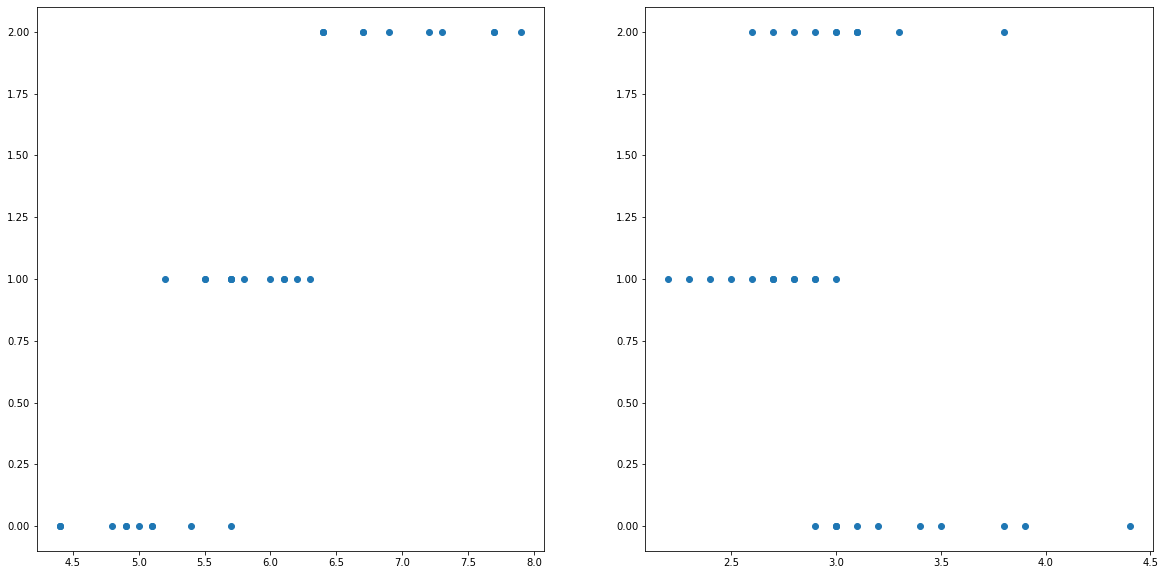

In [7]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.scatter(x_test['sepal length (cm)'], lda.predict(x_test))
plt.subplot(1,2,2)
plt.scatter(x_test['sepal width (cm)'], lda.predict(x_test))

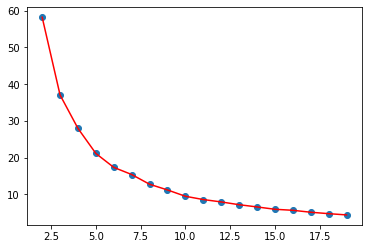

In [8]:
from sklearn.cluster import KMeans
X = []
for i, row in data.iterrows():
    X1 = [data.iloc[i]['sepal length (cm)'], data.iloc[i]['sepal width (cm)']]
    X.append(X1)
k_inertia = []
ks = range(2, 20)
for i in ks:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit_predict(X)
    k_inertia.append(kmeans.inertia_)
plt.scatter(ks, k_inertia)
plt.plot(ks, k_inertia, c='r')

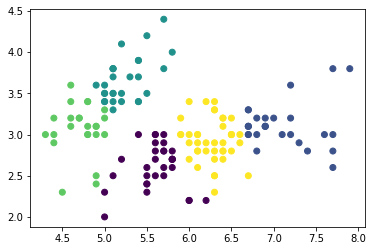

In [10]:
model = KMeans(n_clusters = 5)
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c = model.fit_predict(X))